In [1]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
import statsmodels.api as sm

### One year lag for neighbors forecast

In [2]:
df = pd.read_csv("100419_main_input.csv", parse_dates = ['date'])
# df.set_index('date', inplace = True)
nodes = df.columns.to_list()[5:]
for node in nodes:
    df[node] = df[node].shift(366)
df.dropna(inplace=True)

In [3]:
max_forecast_days = 30
order = (5, 1, 1)  # p, d, q
seasonal_order = (1, 1, 1, 7) # P, D, Q, m
train, test = df[:df.shape[0]-max_forecast_days], df[-max_forecast_days:]

In [4]:
warnings.filterwarnings('ignore')
model_fit = sm.tsa.statespace.SARIMAX(endog=train['price'], exog=train[nodes], order=order, seasonal_order = seasonal_order).fit()
yhat = model_fit.forecast(max_forecast_days, exog = test[nodes])
yhat_pred = model_fit.predict()
yhat_full = pd.concat([yhat_pred, yhat])

In [5]:
rmse_res = mse(test['price'], yhat, squared=False)
mape_res = mape(test['price'], yhat)
print("RMSE:", round(rmse_res, 2), "MAPE:", round(mape_res,3))

RMSE: 114.46 MAPE: 0.057


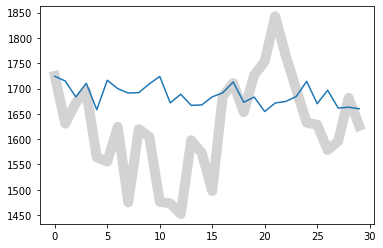

In [16]:
plt.plot(test['price'].to_list(), linewidth = 10, color = 'lightgray')
plt.plot(yhat.to_list())

In [25]:
# Data after bruteforcing
import pickle
with open('SARIMAX-2_lags.pickle', 'rb') as handle:
    p = pickle.load(handle)

t = pd.DataFrame.from_dict(p)
t['weeks'] = t['lag']/7
t.loc[(t['w_ex']<110)]

,lag,no_ex,w_ex,weeks
13,44,120.807192,108.169176,6.285714
19,50,121.911939,106.985319,7.142857
43,74,122.332421,108.016401,10.571429
50,81,121.861630,108.352408,11.571429
55,86,121.799373,105.213477,12.285714
58,89,121.816789,102.522678,12.714286
60,91,122.047787,100.538154,13.000000
69,100,122.320529,103.551745,14.285714
92,123,121.992448,105.541568,17.571429
305,336,118.533921,100.859784,48.000000


Text(0, 0.5, 'price')

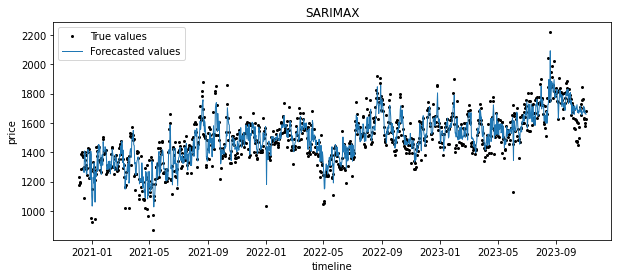

In [16]:
plt.figure(figsize=(10,4))
plt.plot(df['price'], 'o', label = "True values", color='black', markersize=2)
plt.plot(yhat_full[10:], label = "Forecasted values", linewidth = 1)
plt.legend()
plt.xlabel('timeline')
plt.ylabel('price')

In [39]:
# best lag resu:
warnings.filterwarnings('ignore')

df = pd.read_csv("100419_main_input.csv", parse_dates = ['date'])
df.set_index('date', inplace = True)
df1 = df.copy()
nodes = df.columns.to_list()[4:]

for node in nodes:
    df1[node] = df1[node].shift(91)

df1.dropna(inplace=True)
    
train, test = df1[:-max_forecast_days], df1[-max_forecast_days:]
    
# Getting forecast with exogenous variables
model_fit = sm.tsa.statespace.SARIMAX(endog=train['price'], exog=train[nodes], order=order, seasonal_order = seasonal_order).fit()
yhat = model_fit.forecast(max_forecast_days, exog = test[nodes])
yhat_pred = model_fit.predict()
yhat_full = pd.concat([yhat_pred, yhat])
rmse_res = mse(test['price'], yhat, squared=False)
mape_res = mape(test['price'], yhat)
print("RMSE:", round(rmse_res, 2), "MAPE:", round(mape_res,3))

RMSE: 100.54 MAPE: 0.051


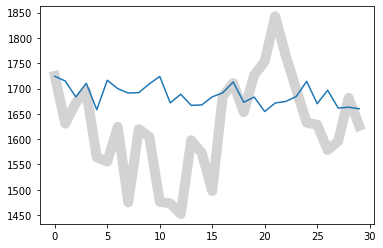

In [22]:
plt.plot(test['price'].to_list(), color='lightgray', linewidth = 10)
plt.plot(yhat.to_list())

Text(0, 0.5, 'price')

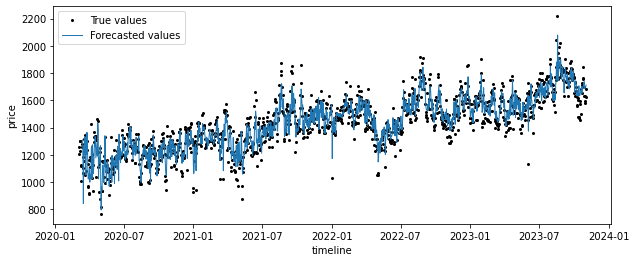

In [41]:
plt.figure(figsize=(10,4))
plt.plot(df1['price'], 'o', label = "True values", color='black', markersize=2)
plt.plot(yhat_full[10:], label = "Forecasted values", linewidth = 1)
plt.legend()
plt.xlabel('timeline')
plt.ylabel('price')